# Derivation of Simplex Airfoil Curve

This section is incomplete, and not necessary if you are willing to accept the code generated above. I am including it since I want to understand exactly how this airfoil gets generated.

The simplex airfoil is a section of the logarithmic spiral curve first developed in 1525 by  Albrecht Dürer and studied extensively by  Jacob Bernoulli, a name that should be familiar to anyone interested in aerodynamics!. This curve is defined by this equation:

\begin{equation}
\rho = a{\rm e}^{k\psi}
\end{equation}


In this equation, written in polar ($\rho$,$\psi$) coordinates, $a (a > 0)$ and $k (k \neq 0)$ are arbitrary constants.

From this defining equation, we can come up with some other helpful equations.

If we divide both sides by $a$ and take the natural logarithm of both sides, we get:

\begin{equation}
\psi = \frac{1}{k}ln\frac{\rho}{a}
\end{equation}


\begin{equation}
k = \frac{1}{\tan{\alpha}}
\end{equation}

Where the slope of the leading edge is defined by $\alpha$. 

We can define the equations for this curve in cartesian coordinates as follows:

\begin{equation}
x = a{\rm e}^{k\psi} \cos(\psi)
\end{equation}

\begin{equation}
y = a{\rm e}^{k\psi} \sin(\psi)
\end{equation}


As $k$ approaches zero, the spiral collapses to a circle. Looking at the documentation for this spiral, as $k$ approaches zero, the limiting case of $\alpha$ is $-\pi/2$. (I have not convinced **sympy** to prove this yet!) 

In [1]:
import sympy
psi, a, k, rho = sympy.symbols('psi a k rho')

In [2]:
eq1 = sympy.exp(k * psi)
eq2 = rho/a
eq3 = sympy.log(eq1)
eq4 = sympy.log(eq2)
print((eq3/k).expand(force=True),"=",eq4/k)

psi = log(rho/a)/k


This is equation 7 above. 

The angle $\alpha$ between the tangent line to the spiral curve and a radial line is given by:
    
\begin{equation}
\tan(\alpha) = \frac{r}{\frac{dr}{d\psi}}
\end{equation}

In [3]:
rho = a * sympy.exp(k * psi)
eq5= sympy.diff(rho, psi)
rho/eq5

1/k

This is equation 8 above. The angle is constant everywhere on the spiral. As $k \rightarrow 0$, the curve collapses to a simple circle with constant radius $a$.

From this result, we get our equation for  𝜓  shown above,

It appears that the spreadsheet uses $\rho/a$ as a parameter, and lets it range from 0 to 1 (actually, from 0 to the chord length). Since the natural logarithm of zero is infinity, the value of $\psi$ is set to $-\pi/2$ when $\rho/a$ is equal to zero. This ends up with the $x$  value running from 0 to the chord length as well. This approximation cleans up the actual behavior of the spiral curve as $\rho/a$ approaches 0.

If we define the angle made between the spiral and the circle passing through this point as $\alpha$, we get:

\begin{equation}
tan(\alpha) = \frac{1}{k}
\end{equation}

Let's look at this curve:

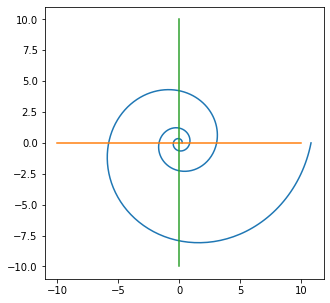

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n=100
a=0.25
k=0.20
th=np.linspace(0, 6*np.pi, 600)
x=a*np.exp(k*th)*np.cos(th)
y=a*np.exp(k*th)*np.sin(th)
plt.figure(figsize=(5,5))
plt.plot(x, y)
plt.plot([-10,10],[0,0])
plt.plot([0,0],[-10,10])
plt.show()

Obviously, we only need a slice of this curve for our airfoil. In this polar system, $psi$ is increasing in a counter-clockwise direction. At $\psi = 0$, the radius is simply equal to $a$. If you look closely at this spiral between angles of $0$ and $\pi/2$, it is apparent that as we sweep to increasing values of $\psi$ we are sweeping from the trailing edge of our desired airfoil to the leading edge. Let's set up a cartesian system that placed the origin at the leading edge $(\psi = 0)$ and the trailing edge at $(\psi = \pi/2)$. We will scale this new system so the length of the chord is one. 

### Slicing off the Simplex Airfoil

The spiral, as defined in polar form, cannot directly define our simplex airfoil. Instead, we need a coordinate transformation that sets up a new cartesian coordinate system we will use instead. 

### Locating the Maximum Point

We can explore these equations and try to locate the point where the height of our airfoil will be a maximum. 

In [5]:
import sympy
y, k, psi = sympy.symbols('y k psi')
x = sympy.E**(k*psi) * sympy.sin(psi)
y = sympy.E**(k*psi) * sympy.cos(psi)

In [6]:
e1 = sympy.diff(x,psi)
e1

k*exp(k*psi)*sin(psi) + exp(k*psi)*cos(psi)

In [7]:
e2 = sympy.diff(y,psi)
e2

k*exp(k*psi)*cos(psi) - exp(k*psi)*sin(psi)

In [8]:
sympy.ratsimp(e2/e1)

(k*cos(psi) - sin(psi))/(k*sin(psi) + cos(psi))

In the above equations $e1$ is $\frac{dx}{d\psi}$ and $e2$ is $\frac{dy}{d\psi}$. Using the chain rule, we get the slope of the curve $\frac{dy}{dx}$. The high point on the curve will occur where this expression equals zero. We can find the equation for $\psi$ where this happens:

In [9]:
eq2 = k * sympy.cos(psi) - sympy.sin(psi)
eq2

k*cos(psi) - sin(psi)

In [10]:
eq3 = sympy.solve(eq2,psi)
eq4 = sympy.simplify(eq3[0])
eq4

2*atan((sqrt(k**2 + 1) - 1)/k)

This is the value of $\psi$ where $y$ is at a max. To find out that height, we plug this back into the equation for $y$:

In [11]:
y.subs(eq4, psi)

exp(k*psi)*cos(psi)